### Biodiversity in National Parks

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [8]:
df_species = pd.read_csv('species_info.csv')
df_observations = pd.read_csv('observations.csv')

Exploratory Data Analysis (EDA) is an approach/philosophy for data analysis that employs a variety of techniques (mostly graphical) to
maximize insight into a data set;
uncover underlying structure;
extract important variables;
detect outliers and anomalies;
test underlying assumptions;
develop parsimonious models; and
determine optimal factor settings.

Most EDA techniques are graphical in nature with a few quantitative techniques. The reason for the heavy reliance on graphics is that by its very nature the main role of EDA is to open-mindedly explore, and graphics gives the analysts unparalleled power to do so, enticing the data to reveal its structural secrets, and being always ready to gain some new, often unsuspected, insight into the data. In combination with the natural pattern-recognition capabilities that we all possess, graphics provides, of course, unparalleled power to carry this out.
The particular graphical techniques employed in EDA are often quite simple, consisting of various techniques of:

Plotting the raw data (such as data traces, histograms, bihistograms, probability plots, lag plots, block plots, and Youden plots.
Plotting simple statistics such as mean plots, standard deviation plots, box plots, and main effects plots of the raw data.
Positioning such plots so as to maximize our natural pattern-recognition abilities, such as using multiple plots per page.

### Basic exploration of species_info.csv

In [13]:
# Top data entries

df_species.head()

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN


In [41]:
# Shape of data

df_species.shape

(5824, 4)

In [17]:
# Number of unique items on each column

for col in df_species:
    print(col + ": " + str(df_species[col].nunique()))

category: 7
scientific_name: 5541
common_names: 5504
conservation_status: 4


In [18]:
# Unique values of each column

print(f"categories:{df_species.category.unique()}")
print(f"conservation_status:{df_species.conservation_status.unique()}")

categories:['Mammal' 'Bird' 'Reptile' 'Amphibian' 'Fish' 'Vascular Plant'
 'Nonvascular Plant']
conservation_status:[nan 'Species of Concern' 'Endangered' 'Threatened' 'In Recovery']


In [24]:
# Number of values for each category

df_species.groupby("category", dropna=False).size()

category
Amphibian              80
Bird                  521
Fish                  127
Mammal                214
Nonvascular Plant     333
Reptile                79
Vascular Plant       4470
dtype: int64

conservation_status
Endangered              16
In Recovery              4
Species of Concern     161
Threatened              10
NaN                   5633
dtype: int64


<AxesSubplot:ylabel='Number of species'>

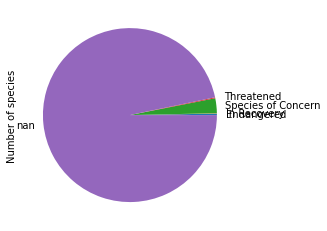

In [34]:
# Number of values for each conservation status

status_size_nan = df_species.groupby("conservation_status", dropna=False).size()
print(status_size_nan)


status_size_nan.plot(kind = 'pie', ylabel = 'Number of species')


conservation_status
Endangered             16
In Recovery             4
Species of Concern    161
Threatened             10
dtype: int64


<AxesSubplot:ylabel='Number of species'>

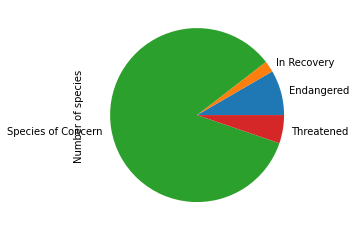

In [35]:
status_size = df_species.groupby("conservation_status").size()
print(status_size)

status_size.plot(kind = 'pie', ylabel = 'Number of species')

In [36]:
# Most observed species

df_species['scientific_name'].value_counts()

Castor canadensis            3
Canis lupus                  3
Hypochaeris radicata         3
Columba livia                3
Puma concolor                3
                            ..
Carex                        1
Hexastylis shuttleworthii    1
Hexastylis heterophylla      1
Hexastylis arifolia          1
Tribulus terrestris          1
Name: scientific_name, Length: 5541, dtype: int64

### Basic exploration of observations.csv

In [38]:
# Top data entries

df_observations.head()

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85


In [40]:
# Shape of data

df_observations.shape

(23296, 3)

In [42]:
# Number of unique items on each column

for col in df_observations:
    print(col + ": " + str(df_observations[col].nunique()))

scientific_name: 5541
park_name: 4
observations: 304


In [44]:
# Unique values of each column

print(f"Park name:{df_observations.park_name.unique()}")

Park name:['Great Smoky Mountains National Park' 'Yosemite National Park'
 'Bryce National Park' 'Yellowstone National Park']


In [45]:
# Number of entries for each park

df_observations.groupby("park_name", dropna=False).size()

park_name
Bryce National Park                    5824
Great Smoky Mountains National Park    5824
Yellowstone National Park              5824
Yosemite National Park                 5824
dtype: int64

<AxesSubplot:ylabel='observations'>

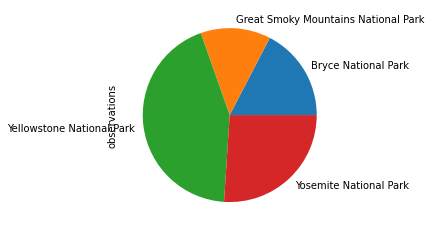

In [48]:
# Number of observations for each park

df_obs_per_park = df_observations.groupby('park_name').observations.sum()

df_obs_per_park.plot(kind = 'pie')

### Exploratory Data Analysis

In [55]:
# Number of species of each category per conservation status

df_species.fillna('No Intervention', inplace=True)
df_species_conservation = df_species\
    .groupby(["conservation_status", "category"])['scientific_name']\
    .count()\
    .unstack()

df_species_conservation

category,Amphibian,Bird,Fish,Mammal,Nonvascular Plant,Reptile,Vascular Plant
conservation_status,,,,,,,
Endangered,1.0,4.0,3.0,7.0,NaN,NaN,1.0
In Recovery,NaN,3.0,NaN,1.0,NaN,NaN,NaN
No Intervention,73.0,442.0,116.0,176.0,328.0,74.0,4424.0
Species of Concern,4.0,72.0,4.0,28.0,5.0,5.0,43.0
Threatened,2.0,NaN,4.0,2.0,NaN,NaN,2.0


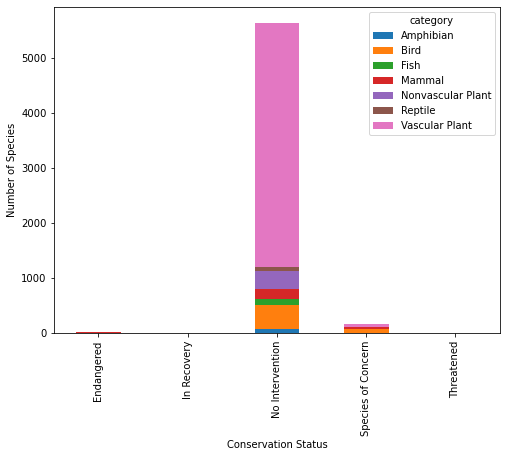

In [57]:
# Plot of distribution of endangered species categories per conservation status

df_species_conservation2 = df_species[df_species != 'No intervention']\
    .groupby(["conservation_status", "category"])['scientific_name']\
    .count()\
    .unstack()

ax = df_species_conservation2.plot(kind = 'bar', figsize=(8,6), 
                               stacked=True)
ax.set_xlabel("Conservation Status")
ax.set_ylabel("Number of Species");